In [1]:
import pandas as pd
df_listings=pd.read_csv('df_listings.csv')

In [2]:
df_listings.shape

(4696, 63)

In [3]:
## Select data of properties within 10km from Victoria Art Museum
from folium.plugins import FastMarkerCluster

In [4]:
# draw maps
lats2018 = df_listings['latitude'].tolist()
lons2018 = df_listings['longitude'].tolist()
locations = list(zip(lats2018, lons2018))
import folium as fo
map1 = fo.Map(location=[-37.82,144.96], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

#经纬度 · 37°49′21″S 144°58′07″E﻿ / ﻿37.822595°S 144.968634°E﻿ / -37.822595; 144.968634 ; 


In [5]:
# draw maps 5km
destination = [-37.82, 144.96] #latitude, longitude
lats = df_listings['latitude'].tolist()
lons = df_listings['longitude'].tolist()
locations = list(zip(lats, lons))
import folium
map1 = folium.Map(location=destination, zoom_start=11.5)
folium.Circle(radius=5000,location=destination, color="black", fill=False).add_to(map1)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [6]:
import numpy as np
from math import *

In [7]:
# # calculate distance
# #a=np.sin(float(df_listings['latitude']))
# df_listings['distance']=2*6371*np.arcsin(np.sqrt(np.sin((df_listings['latitude']+37.82)/2)**2+np.cos('latitude')*np.cos('latitude')*(np.sin((df_listings['longitude']-144.96)/2)**2)))
df=df_listings
df['distance']=2*6371*(
    (
        ((df['latitude'] + 37.82) / 2).apply(sin)**2 +
        (df['latitude']).apply(cos) * (df['latitude']).apply(cos) * (((df['longitude']-144.96)/2).apply(sin)**2)
     ).apply(sqrt)
).apply(asin)

In [8]:
df_listings.shape

(4696, 64)

In [36]:
# Select properties within 10km of the Victoria Art Museum
#df_listings=df[(df['distance']<10)&(df['review_scores_avg6']>2)]
#df[df['distance']<100].shape
df_listings[df_listings['review_scores_avg6']>8].shape

(1308, 64)

In [26]:
df_listings[df_listings['distance']<100].shape

(1331, 64)

In [27]:
df_listings=df[(df['distance']<100)&(df['review_scores_avg6']>8)]

In [28]:
df_listings.shape

(1308, 64)

In [31]:
df_listings['name'].nunique()

1269

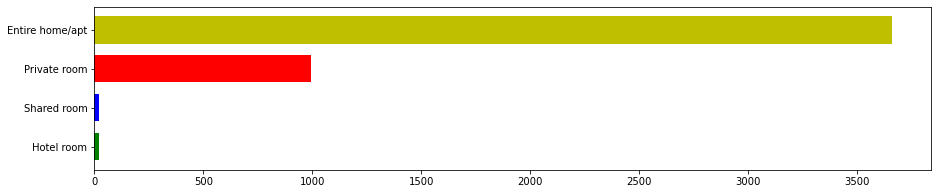

<ipython-input-12-7ef255b4415b>:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rank_data = df.groupby(['host_name'])['profit_per_month','reviews_per_month'].apply(sum)


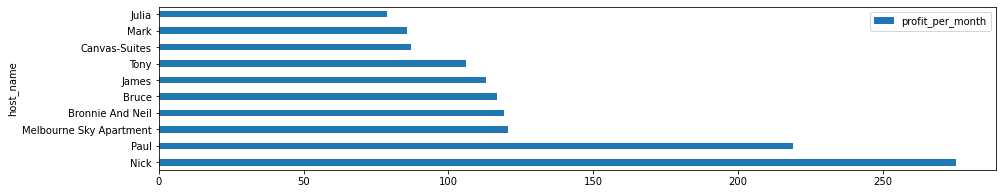

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

from config import *


freq = df['room_type']. value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=0.7, color = ["g","b","r","y"])
plt.show()

# top host
rank_data = df.groupby(['host_name'])['profit_per_month','reviews_per_month'].apply(sum)
rank_data = rank_data.sort_values('profit_per_month', ascending=False)
rank_data.iloc[:10,:1].plot.barh(figsize=(15, 3), width=0.4)
plt.show()

<ipython-input-13-721a88b3f91d>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rank_data = df.groupby(['host_name'])['profit_per_month','reviews_per_month'].apply(sum)


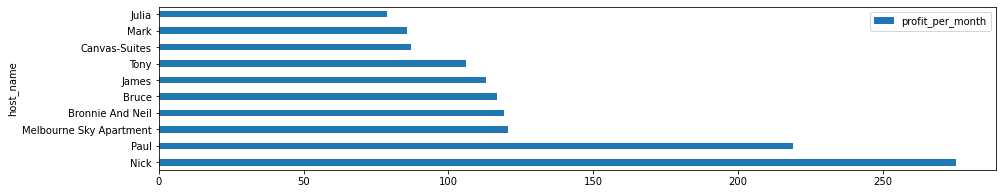

In [13]:
# top 10 host
rank_data = df.groupby(['host_name'])['profit_per_month','reviews_per_month'].apply(sum)
rank_data = rank_data.sort_values('profit_per_month', ascending=False)
rank_data.iloc[:10,:1].plot.barh(figsize=(15, 3), width=0.4)
plt.show()

<ipython-input-32-86c09323ef76>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rank_data = df.groupby(['name'])['profit_per_month','reviews_per_month'].apply(sum)


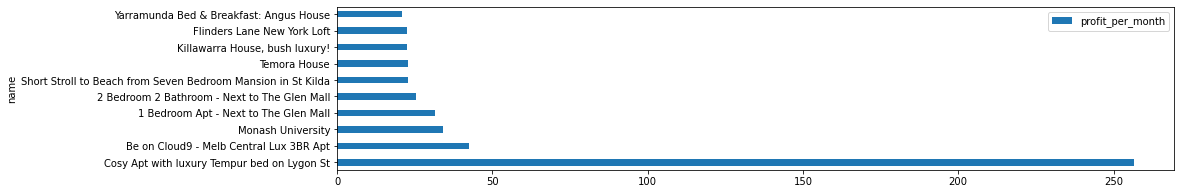

In [32]:
# top 10 host
rank_data = df.groupby(['name'])['profit_per_month','reviews_per_month'].apply(sum)
rank_data = rank_data.sort_values('profit_per_month', ascending=False)
rank_data.iloc[:10,:1].plot.barh(figsize=(15, 3), width=0.4)
plt.show()

In [39]:
df_listings[df['name']=='Cosy Apt with luxury Tempur bed on Lygon St']

<ipython-input-39-9ec8f17114da>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_listings[df['name']=='Cosy Apt with luxury Tempur bed on Lygon St']


,Unnamed: 0,id,listing_url,scrape_id,name,description,neighborhood_overview,host_id,host_name,host_since,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_$,profit_per_month,review_scores_avg6,distance


In [14]:
rank_data.head()

,profit_per_month,reviews_per_month
host_name,,
Nick,275.301463,14.46
Paul,219.178593,222.50
Melbourne Sky Apartment,120.555901,78.48
Bronnie And Neil,119.077783,35.12
Bruce,116.924192,58.46


In [15]:
df['host_name'].value_counts()

Paul                                  85
Bruce                                 66
Beyond A Room                         62
Valeria                               62
Boutique Stays Accommodation Group    51
                                      ..
Kunal                                  1
Charley                                1
Hugues                                 1
Ron                                    1
Jonah                                  1
Name: host_name, Length: 1450, dtype: int64

In [16]:
df[['host_name']=='Nick'].head()

KeyError: False

In [ ]:
#
box = rank_data['profit_per_month']

plt.figure(figsize=(5,10))#设置画布的尺寸
plt.title('profit_per_month of boxplot',fontsize=20)#标题，并设定字号大小

#boxprops：color箱体边框色，facecolor箱体填充色；
plt.boxplot([box],patch_artist = True, boxprops = {'color':'orangered','facecolor':'pink'})

plt.show()#显示图像


In [ ]:
df['profit_per_month'].value_counts().describe()

In [ ]:
# ------------ 分析 ------------
#
# -*- coding: utf-8 -*- 
# @Time : 2022/12/17 12:08 
# @Author : YeMeng 
# @File : demo2.py 
# @contact: 876720687@qq.com


# review 一系列都是得分能够直接获得消费者对这家店的评价
review_score = df[df['number_of_reviews']>=10]

fig = plt.figure(figsize=(20,15))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

ax1 = fig.add_subplot(321)
feq=review_score['review_scores_location'].value_counts().sort_index()
ax1=feq.plot.bar(color='b', width=0.7, rot=0)
#ax1.tick_params(axis = 'both', labelsize = 16)
plt.title("Location", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax2 = fig.add_subplot(322)
feq=review_score['review_scores_cleanliness'].value_counts().sort_index()
ax2=feq.plot.bar(color='b', width=0.7, rot=0)
plt.title("Cleanliness", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax3 = fig.add_subplot(323)
feq=review_score['review_scores_value'].value_counts().sort_index()
ax3=feq.plot.bar(color='b', width=0.7, rot=0)
plt.title("Value", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax4 = fig.add_subplot(324)
feq=review_score['review_scores_communication'].value_counts().sort_index()
ax4=feq.plot.bar(color='b', width=0.7, rot=0)
plt.title("Communication", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax5 = fig.add_subplot(325)
feq=review_score['review_scores_checkin'].value_counts().sort_index()
ax5=feq.plot.bar(color='b', width=0.7, rot=0)
plt.title("Checkin", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax6 = fig.add_subplot(326)
feq=review_score['review_scores_accuracy'].value_counts().sort_index()
ax6=feq.plot.bar(color='b', width=0.7, rot=0)
plt.title("Accuracy", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

plt.tight_layout()
plt.show()


# ----- find the most hot one ---------


# nlp
# ['neighborhood_overview','host_about','host_verifications']



# ----- 聚类 --------
features1 = df.select_dtypes(exclude='object')
# 确定聚类数量
wcss = []

# Fit the model for a range of values for the number of clusters
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features1)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(2, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


# 依据确定值进行类别选取
kmeans=KMeans(n_clusters=6,init='k-means++',n_init=10,max_iter=300,random_state=0)
y_pred=kmeans.fit_predict(features1)
print(y_pred)

# 聚类结果
cat_df_km=df.copy()
cat_df_km['km_result']=y_pred

In [ ]:
cat_df_km['km_result'].value_counts()

In [ ]:
cat_df_km[cat_df_km['km_result']==1]

In [ ]:
df.head()

In [ ]:
df['host_location'].value_counts().head(10)

In [ ]:
# 每个host拥有的房源的数量的 均值、中位数、标准差、最大值、最小值
#df['host_name'].value_counts().describe().plot.barh()
df['host_name'].value_counts().describe()

In [ ]:
#top 10 hots_locations
#数据标签？？？？？
location_data = df['host_location'].value_counts().head(10)
location_data = location_data.sort_values()
rect=location_data.plot.barh(figsize=(15, 3), width=0.4)
x=location_data.index
y=location_data
plt.show()

In [ ]:
print(location_data.index)

In [ ]:
print(location_data)

In [ ]:
df['host_is_superhost']

In [ ]:
# relace 't' to '1', and 'f' to '0' in 'host_is_superhost'column
def format_price(price):
    return(float(price.replace('t','1').replace('f','0')))

df['host_is_superhost_0/1'] = df['host_is_superhost'].apply(format_price) 
df[['host_is_superhost','host_is_superhost_0/1']].head()

In [ ]:
df[['host_is_superhost','host_has_profile_pic','host_identity_verified','instant_bookable']]

In [ ]:
df.dtypes

In [ ]:
#top 10 neighbourhood_cleansed
#数据标签？？？？？
neighbourhood_cleansed_data = df['neighbourhood_cleansed'].value_counts().head(10)
neighbourhood_cleansed_data = neighbourhood_cleansed_data.sort_values()
neighbourhood_cleansed_data.plot.barh(figsize=(15, 3), width=0.4)
x=neighbourhood_cleansed_data.index
y=neighbourhood_cleansed_data
plt.show()

In [ ]:
#top15 types of property
#数据标签？？？？？
property_type_data = df['property_type'].value_counts().head(15)
property_type_data = property_type_data.sort_values()
property_type_data.plot.barh(figsize=(15, 3), width=0.4)
x=property_type_data.index
y=property_type_data
plt.show()

In [ ]:
# show top15 types of property
pd.set_option ('display.max_rows', 1000) 
pd.set_option ('display.max_columns', 1000)
df['property_type'].value_counts().head(15)

In [ ]:
# show top15 types of property
pd.set_option ('display.max_rows', 1000) 
pd.set_option ('display.max_columns', 1000)
df['bathrooms_text'].value_counts()

In [ ]:
df_reviews = pd.read_csv('reviews.csv')

In [ ]:
df_reviews = df_reviews[~df_reviews['comments'].isna()]

In [ ]:
#drop rows that 'listing_id' doesn't exist in the 'id' of 'listings' and create a new dataset'concat'
# merge dataset 'listings' and 'reviews' with the same 'id'
df_reviews.drop(columns=['id'],inplace=True)
df_reviews = df_reviews.rename(columns={'listing_id': 'id'})
df_concat = pd.merge(df,df_reviews,how="inner",on='id')

In [ ]:
df_concat.to_csv("df_concat.csv")

In [ ]:
df_concat.shape

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
scorer = SentimentIntensityAnalyzer()

In [ ]:
def calculate_sentiment(comment):
    return(scorer.polarity_scores(comment)['compound'])

df_concat.loc[:,'sentiment'] = df_concat['comments'].apply(calculate_sentiment)
df_concat[['comments','sentiment']].head(10)

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
scorer = SentimentIntensityAnalyzer()

In [ ]:
#calculate sentiments of reviews
#因为有一些列是中文，所以说分数会是零分，我们要找到这些零分的行,然后将它删去
def calculate_sentiment(comment):
    return(scorer.polarity_scores(comment)['compound'])

df_concat.loc[:,'sentiment'] = df_concat['comments'].apply(calculate_sentiment)
df_concat[['comments','sentiment']].head()

In [ ]:
#delete rows of sentiment=0, means words in Chinese
df_concat=df_concat[df_concat['sentiment']!=0]

In [ ]:
df_concat.shape

In [ ]:
# box plots of reviews sentiment
box = df_concat['sentiment']

plt.figure(figsize=(5,10))#设置画布的尺寸
plt.title('sentiment of boxplot',fontsize=20)#标题，并设定字号大小

#boxprops：color箱体边框色，facecolor箱体填充色；
plt.boxplot([box],patch_artist = True, boxprops = {'color':'orangered','facecolor':'pink'})

plt.show()#显示图像


In [ ]:
!pip install seaborn

In [ ]:
# neighbourhood_cleansed_data = df['neighbourhood_cleansed'].value_counts().head(10)
# neighbourhood_cleansed_data = neighbourhood_cleansed_data.sort_values()
# neighbourhood_cleansed_data.plot.barh(figsize=(15, 3), width=0.4)
# x=neighbourhood_cleansed_data.index
# y=neighbourhood_cleansed_data
# plt.show()
import seaborn as sns
sns.scatterplot(data=df_concat,x=df_concat['sentiment'].index,y=df_concat['sentiment'])

In [ ]:
# 新增六个项目内容
# 合并完成内容在concat数据集当中
import pandas as pd
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

from config import *

# 2. the most top 30 words in newreview data
# the reviews are mainly from the 'comment' column.

reviews_details = df_concat[['name', 'host_id', 'host_name', 'date', 'reviewer_id', 'reviewer_name', 'comments']]

host_reviews = reviews_details.groupby(['host_id', 'host_name']).size().sort_values(ascending=False).to_frame(name = "number_of_reviews")
# you can show something by the code below.
# host_reviews.head()
# reviews_details.comments.head()
# reviews_details.comments.values[1]

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
# and the basic pre processing code for comment. take out empty comments. 并对评论的各种格式进行修改，其中存在很多无意义的连接和我们并不希望进行统计的内容
reviews_details = reviews_details[reviews_details['comments'].notnull()]
#remove numbers
reviews_details['comments'] = reviews_details['comments'].str.replace('\d+', '')
#all to lowercase
reviews_details['comments'] = reviews_details['comments'].str.lower()
#remove windows new line
reviews_details['comments'] = reviews_details['comments'].str.replace('\r\n', "")
#remove stopwords (from nltk library)
stop_english = stopwords.words("english")
reviews_details['comments'] = reviews_details['comments'].apply(lambda x: " ".join([i for i in x.split()
                                                      if i not in (stop_english)]))
# remove punctuation
reviews_details['comments'] = reviews_details['comments'].str.replace('[^\w\s]'," ")
# replace x spaces by one space
reviews_details['comments'] = reviews_details['comments'].str.replace('\s+', ' ')

print(reviews_details.comments.values[2])

# find the most used words using the CountVectorizer() function of sklearn.
texts = reviews_details.comments.tolist()

vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

cvec_df = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
# 柱状图展示
# cvec_df.head(10).plot.barh(figsize=(15, 3), width=0.4)
plt.barh(cvec_df.head(10).words.to_list(),
         cvec_df.head(10).counts.to_list()
         )
plt.show()

# 词云展示
cvec_dict = dict(zip(cvec_df.words, cvec_df.counts))

wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



In [ ]:
# 3. Perimeter of number of listings per host.
# 我们需要找到最终入围的host有哪几个人？这个可以说是爱彼迎的优质会员了
df = df_concat
df = reduce_mem_usage(df)

# host_names = df[['host_name']].drop_duplicates()
# host_names = host_names.host_name.str.lower().tolist()
# print(len(host_names))

# 你需要什么内容这里选择一下就能显示了
# col_describe = ["host_is_superhost","host_listings_count","accommodates","bedrooms","beds"]# 太多了，需要自己选
# df.groupby(by="host_name")[col_describe].sum().describe()
#df.groupby(by="host_name").sum().describe()
df.groupby(by="host_name")["host_listings_count"].sum().describe()

In [ ]:
# 4. 计算从1-12⽉每个⽉的不同roomtype的数量（按照⽉份来计算）
# 从new review的⽂档⾥⾯，列出 id， room type，date 先将data⾥⾯拆分为year month day计算/拿出month另起⼀列计算
df4 = df[["id","room_type","date"]]
df4['date']=pd.to_datetime(df4['date'],format='%Y-%m-%d')
df4["data_year"]=df4.date.dt.year
df4["data_month"]=df4.date.dt.month
df4["data_day"]=df4.date.dt.day
df_grouped = df4.groupby(by="data_month")["room_type"].value_counts()
# Unstack the data to get it into a format that can be plotted
df_unstacked = df_grouped.unstack()


## Create a figure and a 3D axis
fig = plt.figure()
ax = plt.axes(projection='3d')
for line in df_unstacked.columns:
    # Plot the data set as a 2D line chart
    ax.plot(df_unstacked.index, df_unstacked[line])
# ax.plot(df_unstacked.index, df_unstacked["Entire home/apt"])
# ax.plot(df_unstacked.index, df_unstacked["Private room"])
# ax.plot(df_unstacked.index, df_unstacked["Shared room"])
# ax.plot(df_unstacked.index, df_unstacked["Hotel room"])
# Show the plot
plt.show()


# Create a figure and a 2D axis
#fig = plt.figure()
#ax = plt.axes()
#ax.plot(df_unstacked.index, df_unstacked["Entire home/apt"])
# ax.plot(df_unstacked.index, df_unstacked["Private room"])
# ax.plot(df_unstacked.index, df_unstacked["Shared room"])
# ax.plot(df_unstacked.index, df_unstacked["Hotel room"])
# Show the plot
# plt.show()


In [ ]:
# 5.Show计算不同⽉份的price情况
# 从new review的⽂档⾥⾯，列出 id，price，date\
df5 = df[["id","price_$","date"]]
df5['date']=pd.to_datetime(df5['date'],format='%Y-%m-%d')
df5["data_year"]=df5.date.dt.year
df5["data_month"]=df5.date.dt.month
df5["data_day"]=df5.date.dt.day

df5['price_$']=df5['price_$'].astype("float64")
df_grouped2 = df5.groupby(by="data_month")["price_$"].sum()
df_grouped2.plot.barh()
plt.show()

In [ ]:
print(df_grouped2)

In [ ]:
# 6.room type和price 直接的关系，横坐标是month
df6=df[["id","room_type","price_$","date"]]
df6['date']=pd.to_datetime(df6['date'],format='%Y-%m-%d')
df6["data_year"]=df6.date.dt.year
df6["data_month"]=df6.date.dt.month
df6["data_day"]=df6.date.dt.day
df6['price_$']=df6['price_$'].astype("float64")
df_grouped3 = df6.groupby(["data_month", "room_type"])['price_$'].mean()
# for analysis
# df_grouped3 = df6.groupby(["data_month", "room_type"])
# aggregated = df_grouped3.agg({'price_$': ['mean', 'max']})

# this could be the output.
df_unstacked = df_grouped3.unstack()


# -*- coding: utf-8 -*- 
# @Time : 2022/12/19 19:15 
# @Author : YeMeng 
# @File : vis3.py 
# @contact: 876720687@qq.com
# TODO:没有用


# import matplotlib.pyplot as plt
# import numpy as np
# # Fixing random state for reproducibility
# np.random.seed(19680801)
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# # 输入x y 值
# x, y = np.random.rand(2, 5)
# # 对应2d z值
# hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 2], [0, 2]])
# # Construct arrays for the anchor positions of the 16 bars.
# xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
# xpos = xpos.ravel()
# ypos = ypos.ravel()
# zpos = 0
# # Construct arrays with the dimensions for the 16 bars.
# dx = dy = 0.5 * np.ones_like(zpos)
# dz = hist.ravel()
# ax.bar3d(xpos, ypos, zpos, dx, dy, dz)
# plt.show()


import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
colors = ['r', 'g', 'b', 'y']
yticks = [3, 2, 1, 0]
for c, k in zip(colors, yticks):
    # Generate the random data for the y=k 'layer'.
    xs = np.arange(20)
    ys = np.random.rand(20)
    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    cs = [c] * len(xs)
    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# On the y-axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)
plt.show()



# 3d
# df_unstacked = df_grouped3.unstack()
# x = df_unstacked.index.to_list()
# y = df_unstacked.columns.to_list()
# zpos=0
# dz = df_unstacked.values.ravel()
# # Create a figure and an axis
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# # Use ax.bar3d to create a 3D bar chart
# ax.bar3d(x=np.arange(len(x)),
#          y=np.arange(len(y)),
#          z=zpos,
#          dx=0.5,
#          dy=0.5,
#          dz=dz)
# # Set the x- and y-axis labels
# ax.set_xticks(np.arange(len(x)))
# ax.set_yticks(np.arange(len(y)))
# ax.set_xticklabels(x)
# ax.set_yticklabels(y)
# # Show the plot
# plt.show()

In [ ]:
print(df_unstacked)

In [ ]:
# -*- coding: utf-8 -*- 
# @Time : 2022/12/19 10:17 
# @Author : YeMeng 
# @File : vis2.py 
# @contact: 876720687@qq.com
# 新增六个项目内容
# 合并完成内容在concat数据集当中
import pandas as pd
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

from config import *

# 2. the most top 30 words in newreview data
# the reviews are mainly from the 'comment' column.

reviews_details = df_concat[['name', 'host_id', 'host_name', 'date', 'reviewer_id', 'reviewer_name', 'comments']]

host_reviews = reviews_details.groupby(['host_id', 'host_name']).size().sort_values(ascending=False).to_frame(name = "number_of_reviews")
# you can show something by the code below.
# host_reviews.head()
# reviews_details.comments.head()
# reviews_details.comments.values[1]

# and the basic pre processing code for comment. take out empty comments. 并对评论的各种格式进行修改，其中存在很多无意义的连接和我们并不希望进行统计的内容
reviews_details = reviews_details[reviews_details['comments'].notnull()]
#remove numbers
reviews_details['comments'] = reviews_details['comments'].str.replace('\d+', '')
#all to lowercase
reviews_details['comments'] = reviews_details['comments'].str.lower()
#remove windows new line
reviews_details['comments'] = reviews_details['comments'].str.replace('\r\n', "")
#remove stopwords (from nltk library)
stop_english = stopwords.words("english")
reviews_details['comments'] = reviews_details['comments'].apply(lambda x: " ".join([i for i in x.split()
                                                      if i not in (stop_english)]))
# remove punctuation
reviews_details['comments'] = reviews_details['comments'].str.replace('[^\w\s]'," ")
# replace x spaces by one space
reviews_details['comments'] = reviews_details['comments'].str.replace('\s+', ' ')

print(reviews_details.comments.values[2])

# find the most used words using the CountVectorizer() function of sklearn.
texts = reviews_details.comments.tolist()

vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

cvec_df = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
# 柱状图展示
# cvec_df.head(10).plot.barh(figsize=(15, 3), width=0.4)
plt.barh(cvec_df.head(10).words.to_list(),
         cvec_df.head(10).counts.to_list()
         )
plt.show()

# 词云展示
cvec_dict = dict(zip(cvec_df.words, cvec_df.counts))

wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



# 3. Perimeter of number of listings per host.
# 我们需要找到最终入围的host有哪几个人？这个可以说是爱彼迎的优质会员了
df = pd.read_csv(data_out+"df_concat.csv")
df = reduce_mem_usage(df)

# host_names = df[['host_name']].drop_duplicates()
# host_names = host_names.host_name.str.lower().tolist()
# print(len(host_names))

# 你需要什么内容这里选择一下就能显示了
# col_describe = ["host_is_superhost","host_listings_count","accommodates","bedrooms","beds"]# 太多了，需要自己选
# df.groupby(by="host_name")[col_describe].sum().describe()
df.groupby(by="host_name").sum().describe()




# 4. 计算从1-12⽉每个⽉的不同roomtype的数量（按照⽉份来计算）
# 从new review的⽂档⾥⾯，列出 id， room type，date 先将data⾥⾯拆分为year month day计算/拿出month另起⼀列计算
df4 = df[["id","room_type","","date"]]
df4['date']=pd.to_datetime(df4['date'],format='%Y-%m-%d')
df4["data_year"]=df4.date.dt.year
df4["data_month"]=df4.date.dt.month
df4["data_day"]=df4.date.dt.day
df_grouped = df4.groupby(by="data_month")["room_type"].value_counts()
# Unstack the data to get it into a format that can be plotted
df_unstacked = df_grouped.unstack()


## Create a figure and a 3D axis
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# for line in df_unstacked.columns:
#     # Plot the data set as a 2D line chart
#     ax.plot(df_unstacked.index, df_unstacked[line])
# # ax.plot(df_unstacked.index, df_unstacked["Entire home/apt"])
# # ax.plot(df_unstacked.index, df_unstacked["Private room"])
# # ax.plot(df_unstacked.index, df_unstacked["Shared room"])
# # ax.plot(df_unstacked.index, df_unstacked["Hotel room"])
# # Show the plot
# plt.show()


# Create a figure and a 2D axis
fig = plt.figure()
ax = plt.axes()
# ax.plot(df_unstacked.index, df_unstacked["Entire home/apt"])
# ax.plot(df_unstacked.index, df_unstacked["Private room"])
ax.plot(df_unstacked.index, df_unstacked["Shared room"])
ax.plot(df_unstacked.index, df_unstacked["Hotel room"])
# Show the plot
plt.show()


# 5.Show计算不同⽉份的price情况
# 从new review的⽂档⾥⾯，列出 id，price，date\
df5 = df[["id","price_$","date"]]
df5['date']=pd.to_datetime(df5['date'],format='%Y-%m-%d')
df5["data_year"]=df5.date.dt.year
df5["data_month"]=df5.date.dt.month
df5["data_day"]=df5.date.dt.day

df5['price_$']=df5['price_$'].astype("float64")
df_grouped2 = df5.groupby(by="data_month")["price_$"].sum()
df_grouped2.plot.barh()
plt.show()


# 6.room type和price 直接的关系，横坐标是month
df6=df[["id","room_type","price_$","date"]]
df6['date']=pd.to_datetime(df6['date'],format='%Y-%m-%d')
df6["data_year"]=df6.date.dt.year
df6["data_month"]=df6.date.dt.month
df6["data_day"]=df6.date.dt.day
df6['price_$']=df6['price_$'].astype("float64")
df_grouped3 = df6.groupby(["data_month", "room_type"])['price_$'].mean()
# for analysis
# df_grouped3 = df6.groupby(["data_month", "room_type"])
# aggregated = df_grouped3.agg({'price_$': ['mean', 'max']})

# this could be the output.
df_unstacked = df_grouped3.unstack()
 81  
vis3.py
Viewed
@@ -0,0 +1,81 @@
# -*- coding: utf-8 -*- 
# @Time : 2022/12/19 19:15 
# @Author : YeMeng 
# @File : vis3.py 
# @contact: 876720687@qq.com
# TODO:没有用


# import matplotlib.pyplot as plt
# import numpy as np
# # Fixing random state for reproducibility
# np.random.seed(19680801)
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# # 输入x y 值
# x, y = np.random.rand(2, 5)
# # 对应2d z值
# hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 2], [0, 2]])
# # Construct arrays for the anchor positions of the 16 bars.
# xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
# xpos = xpos.ravel()
# ypos = ypos.ravel()
# zpos = 0
# # Construct arrays with the dimensions for the 16 bars.
# dx = dy = 0.5 * np.ones_like(zpos)
# dz = hist.ravel()
# ax.bar3d(xpos, ypos, zpos, dx, dy, dz)
# plt.show()


import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
colors = ['r', 'g', 'b', 'y']
yticks = [3, 2, 1, 0]
for c, k in zip(colors, yticks):
    # Generate the random data for the y=k 'layer'.
    xs = np.arange(20)
    ys = np.random.rand(20)
    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    cs = [c] * len(xs)
    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, ys, zs=k, zdir='y', color=cs, alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# On the y-axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)
plt.show()



# 3d
# df_unstacked = df_grouped3.unstack()
# x = df_unstacked.index.to_list()
# y = df_unstacked.columns.to_list()
# zpos=0
# dz = df_unstacked.values.ravel()
# # Create a figure and an axis
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# # Use ax.bar3d to create a 3D bar chart
# ax.bar3d(x=np.arange(len(x)),
#          y=np.arange(len(y)),
#          z=zpos,
#          dx=0.5,
#          dy=0.5,
#          dz=dz)
# # Set the x- and y-axis labels
# ax.set_xticks(np.arange(len(x)))
# ax.set_yticks(np.arange(len(y)))
# ax.set_xticklabels(x)
# ax.set_yticklabels(y)
# # Show the plot
# plt.show()

In [ ]:
# 运行更多行的代码
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_columns', 100)

import numpy as np

# reduce volumn of dataset stored in RAM/memory
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
!pip install histogram -i https://pypi.tuna.tsinghua.edu.cn/simple/

In [ ]:
!pip install plotly

In [ ]:
# Statistics
import pandas as pd
import numpy as np
import math as mt

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [ ]:
fig = px.histogram(df.dropna(subset=['room_type'], axis=0), 
                   x='price', 
                   histnorm='percent',
                   color='room_type',
                   title='Histogram of price vs. room_type')
fig.show()

In [ ]:
df.head()

In [ ]:
#px.set_mapbox_access_token(open(".mapbox_galaxy").read())
px.set_mapbox_access_token('pk.eyJ1IjoiemFja3NhbWJlciIsImEiOiJjazc3MXI1NjQwMXIzM25vMnBtMWtpNWFjIn0.FHxYZnEoStWmap8EQe2l-g')
fig = px.scatter_mapbox(df[df.dtype], 
                        lat='latitude', 
                        lon='longitude',
                        color='neighbourhood_cleansed', 
                        size='price', 
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        hover_name='id',
                        hover_data=['property_type', 'room_type'],
                        size_max=15, 
                        zoom=10,
                        title='Map of price group by neighbourhood_cleansed')
fig.show()